# Langgraph Basic
- State와 방향성이 Point

In [14]:
from dotenv import load_dotenv
load_dotenv()

True

## 1. State

In [15]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

In [16]:
class BasicState(TypedDict):
    messages: Annotated[list, add_messages]

In [21]:
def chat(state: BasicState):
    model = ChatOpenAI(
        model_name="gpt-4.1-mini",
        temperature=0
    )
    
    return {'messages': [model.invoke(state['messages'])]}

## 2. Graph(Node/Edge)

In [22]:
graph_bulider = StateGraph(BasicState)
graph_bulider.__dict__

{'nodes': {},
 'edges': set(),
 'branches': defaultdict(dict, {}),
 'schemas': {__main__.BasicState: {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x1c97fe2efc0>}},
 'channels': {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x1c97fe2efc0>},
 'managed': {},
 'compiled': False,
 'waiting_edges': set(),
 'state_schema': __main__.BasicState,
 'input_schema': __main__.BasicState,
 'output_schema': __main__.BasicState,
 'context_schema': None}

In [23]:
graph_bulider.add_node('graphChatbot', chat)
graph_bulider.__dict__

{'nodes': {'graphChatbot': StateNodeSpec(runnable=graphChatbot(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None, input_schema=<class '__main__.BasicState'>, retry_policy=None, cache_policy=None, ends=(), defer=False)},
 'edges': set(),
 'branches': defaultdict(dict, {}),
 'schemas': {__main__.BasicState: {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x1c97fe2efc0>}},
 'channels': {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x1c97fe2efc0>},
 'managed': {},
 'compiled': False,
 'waiting_edges': set(),
 'state_schema': __main__.BasicState,
 'input_schema': __main__.BasicState,
 'output_schema': __main__.BasicState,
 'context_schema': None}

In [26]:
graph_bulider.add_edge(START, 'graphChatbot')
graph_bulider.__dict__

{'nodes': {'graphChatbot': StateNodeSpec(runnable=graphChatbot(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None, input_schema=<class '__main__.BasicState'>, retry_policy=None, cache_policy=None, ends=(), defer=False)},
 'edges': {('__start__', 'graphChatbot'), ('graphChatbot', '__end__')},
 'branches': defaultdict(dict, {}),
 'schemas': {__main__.BasicState: {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x1c97fe2efc0>}},
 'channels': {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x1c97fe2efc0>},
 'managed': {},
 'compiled': False,
 'waiting_edges': set(),
 'state_schema': __main__.BasicState,
 'input_schema': __main__.BasicState,
 'output_schema': __main__.BasicState,
 'context_schema': None}

In [27]:
graph_bulider.add_edge('graphChatbot', END)
graph_bulider.__dict__

{'nodes': {'graphChatbot': StateNodeSpec(runnable=graphChatbot(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None, input_schema=<class '__main__.BasicState'>, retry_policy=None, cache_policy=None, ends=(), defer=False)},
 'edges': {('__start__', 'graphChatbot'), ('graphChatbot', '__end__')},
 'branches': defaultdict(dict, {}),
 'schemas': {__main__.BasicState: {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x1c97fe2efc0>}},
 'channels': {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x1c97fe2efc0>},
 'managed': {},
 'compiled': False,
 'waiting_edges': set(),
 'state_schema': __main__.BasicState,
 'input_schema': __main__.BasicState,
 'output_schema': __main__.BasicState,
 'context_schema': None}

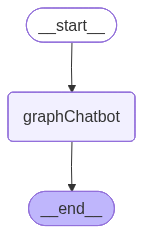

In [29]:
graph = graph_bulider.compile()
graph

In [30]:
question = '팔란티어에 대해서 알려줘'

In [31]:
result = graph.invoke({'messages' : [('user', question)]})
result

{'messages': [HumanMessage(content='팔란티어에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='282279fe-8221-4df6-80c5-41ba7fbd23ec'),
  AIMessage(content='팔란티어(Palantir Technologies)는 미국의 데이터 분석 및 소프트웨어 회사로, 주로 대규모 데이터 통합, 분석, 시각화 솔루션을 제공합니다. 2003년에 피터 틸(Peter Thiel), 네이선 게팅스(Nathan Gettings), 조 로스스타인(Joe Lonsdale), 스티븐 코헨(Stephen Cohen), 알렉스 카프(Alex Karp) 등이 공동 설립했습니다.\n\n### 주요 정보\n- **본사:** 미국 캘리포니아주 팔로알토\n- **주요 제품:**\n  - **Palantir Gotham:** 주로 정부 기관과 정보기관에서 사용하는 플랫폼으로, 테러 방지, 범죄 수사, 국방 등 다양한 분야에서 활용됩니다.\n  - **Palantir Foundry:** 기업용 데이터 통합 및 분석 플랫폼으로, 금융, 제조, 헬스케어 등 다양한 산업에서 사용됩니다.\n- **주요 고객:** 미국 정부 기관(국방부, CIA, FBI 등), 금융기관, 대기업 등\n- **상장:** 2020년 9월 뉴욕증권거래소(NYSE)에 직접 상장(Direct Listing) 방식으로 상장됨\n\n### 특징 및 강점\n- 방대한 데이터를 실시간으로 통합하고 분석할 수 있는 강력한 플랫폼 제공\n- 복잡한 데이터셋을 시각화하여 의사결정을 지원\n- 보안과 프라이버시를 중시하는 설계\n- 정부 및 민간 부문에서 폭넓게 활용\n\n팔란티어는 빅데이터와 인공지능 기술을 활용해 복잡한 문제를 해결하는 데 중점을 두고 있으며, 특히 국가 안보와 관련된 분야에서 중요한 역할을 하고 있습니다.', additional_kwargs={'refusal': None}, response_metadata

In [32]:
for item in result['messages']:
    print(item.content)
    print('='*100)

팔란티어에 대해서 알려줘
팔란티어(Palantir Technologies)는 미국의 데이터 분석 및 소프트웨어 회사로, 주로 대규모 데이터 통합, 분석, 시각화 솔루션을 제공합니다. 2003년에 피터 틸(Peter Thiel), 네이선 게팅스(Nathan Gettings), 조 로스스타인(Joe Lonsdale), 스티븐 코헨(Stephen Cohen), 알렉스 카프(Alex Karp) 등이 공동 설립했습니다.

### 주요 정보
- **본사:** 미국 캘리포니아주 팔로알토
- **주요 제품:**
  - **Palantir Gotham:** 주로 정부 기관과 정보기관에서 사용하는 플랫폼으로, 테러 방지, 범죄 수사, 국방 등 다양한 분야에서 활용됩니다.
  - **Palantir Foundry:** 기업용 데이터 통합 및 분석 플랫폼으로, 금융, 제조, 헬스케어 등 다양한 산업에서 사용됩니다.
- **주요 고객:** 미국 정부 기관(국방부, CIA, FBI 등), 금융기관, 대기업 등
- **상장:** 2020년 9월 뉴욕증권거래소(NYSE)에 직접 상장(Direct Listing) 방식으로 상장됨

### 특징 및 강점
- 방대한 데이터를 실시간으로 통합하고 분석할 수 있는 강력한 플랫폼 제공
- 복잡한 데이터셋을 시각화하여 의사결정을 지원
- 보안과 프라이버시를 중시하는 설계
- 정부 및 민간 부문에서 폭넓게 활용

팔란티어는 빅데이터와 인공지능 기술을 활용해 복잡한 문제를 해결하는 데 중점을 두고 있으며, 특히 국가 안보와 관련된 분야에서 중요한 역할을 하고 있습니다.


## 3. Tool

In [33]:
from langgraph.prebuilt.tool_node import ToolNode, tools_condition
from langchain_tavily import TavilySearch

In [34]:
# 1. Tool 세팅
search_tool = TavilySearch(max_results=3)
tools = [search_tool]
tools

[TavilySearch(max_results=3, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'), api_base_url=None))]

In [35]:
# 2. State 정의
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [36]:
# 3. LLM + Tool 연결
model = ChatOpenAI(
    model='gpt-4.1-mini',
    temperature=0
)

llm_with_tool = model.bind_tools(tools)
llm_with_tool

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001C97FE23E90>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001C97FE202D0>, root_client=<openai.OpenAI object at 0x000001C96137BF10>, root_async_client=<openai.AsyncOpenAI object at 0x000001C97FE23B10>, model_name='gpt-4.1-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'de

In [37]:
# 4. chatbot 노드 생성
def agent_chatbot(state: State):
    answer = llm_with_tool.invoke(state['messages'])
    return {'messages': [answer]}

graph_builder = StateGraph(State)
graph_builder.add_node('chatbot', agent_chatbot)
graph_builder.__dict__

{'nodes': {'chatbot': StateNodeSpec(runnable=chatbot(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None, input_schema=<class '__main__.State'>, retry_policy=None, cache_policy=None, ends=(), defer=False)},
 'edges': set(),
 'branches': defaultdict(dict, {}),
 'schemas': {__main__.State: {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x1c910206e40>}},
 'channels': {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x1c910206e40>},
 'managed': {},
 'compiled': False,
 'waiting_edges': set(),
 'state_schema': __main__.State,
 'input_schema': __main__.State,
 'output_schema': __main__.State,
 'context_schema': None}

In [38]:
# 5. 도구 노드 생성
tool_node = ToolNode(tools=tools)
graph_builder.add_node('tools', tool_node)
graph_builder.__dict__

{'nodes': {'chatbot': StateNodeSpec(runnable=chatbot(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None, input_schema=<class '__main__.State'>, retry_policy=None, cache_policy=None, ends=(), defer=False),
  'tools': StateNodeSpec(runnable=tools(tags=None, recurse=True, explode_args=False, func_accepts={'config': ('N/A', <class 'inspect._empty'>), 'store': ('store', None)}, tools_by_name={'tavily_search': TavilySearch(max_results=3, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'), api_base_url=None))}, tool_to_state_args={'tavily_search': {}}, tool_to_store_arg={'tavily_search': None}, handle_tool_errors=True, messages_key='messages'), metadata=None, input_schema=<class '__main__.State'>, retry_policy=None, cache_policy=None, ends=(), defer=False)},
 'edges': set(),
 'branches': defaultdict(dict, {}),
 'schemas': {__main__.State: {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x1c910206e40>}},
 'channels': {'messages

In [39]:
# 6. 조건부 엣지 설정
graph_builder.add_conditional_edges(
    source='chatbot',
    path=tools_condition,
    path_map={'tools' : 'tools', END : END}
)
graph_builder.__dict__

{'nodes': {'chatbot': StateNodeSpec(runnable=chatbot(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None, input_schema=<class '__main__.State'>, retry_policy=None, cache_policy=None, ends=(), defer=False),
  'tools': StateNodeSpec(runnable=tools(tags=None, recurse=True, explode_args=False, func_accepts={'config': ('N/A', <class 'inspect._empty'>), 'store': ('store', None)}, tools_by_name={'tavily_search': TavilySearch(max_results=3, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'), api_base_url=None))}, tool_to_state_args={'tavily_search': {}}, tool_to_store_arg={'tavily_search': None}, handle_tool_errors=True, messages_key='messages'), metadata=None, input_schema=<class '__main__.State'>, retry_policy=None, cache_policy=None, ends=(), defer=False)},
 'edges': set(),
 'branches': defaultdict(dict,
             {'chatbot': {'tools_condition': BranchSpec(path=tools_condition(tags=None, recurse=True, explode_args=False, func_accepts={}), e

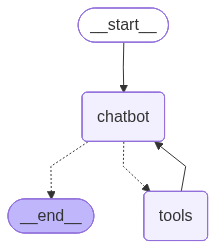

In [40]:
# 7. 엣지 연결
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

# 8. 그래프 컴파일
graph = graph_builder.compile()
graph

In [41]:
# 프롬프트에서 웹서치를 해달라고 명시적으로 말해야, tool을 사용하는 것 주의
question = "2025년 석촌역에 10월에 축제 하는거 알아? 우선 그 축제부터 찾고, 이후에 세부내용 웹서치 해서 다시 말해줘"

for evt in graph.stream({"messages": question}, stream_mode="values"):
    for key, value in evt.items():
        print("-"*30, key, "-"*30)
        value[-1].pretty_print()

------------------------------ messages ------------------------------
================================ Human Message =================================

2025년 석촌역에 10월에 축제 하는거 알아? 우선 그 축제부터 찾고, 이후에 세부내용 웹서치 해서 다시 말해줘
------------------------------ messages ------------------------------
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_1whQ5f7Rt6VKiBbRuQ1RutZx)
 Call ID: call_1whQ5f7Rt6VKiBbRuQ1RutZx
  Args:
    query: 2025년 10월 석촌역 축제
------------------------------ messages ------------------------------
================================= Tool Message =================================
Name: tavily_search

{"query": "2025년 10월 석촌역 축제", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.nxsquare.com/cocsmagazinefestivals/?bmode=view&idx=168069363", "title": "2025 송파낭만페스타, 석촌호수에서 펼쳐지는 클래식·영화음악", "content": "행사 개요. 행사명 : 2025 송파낭만페스타. 일시 : 2025년 10월 11일(토) 11:00 ~ 19:30. 장소 : 서울 송파구 석촌